<b>*Problem Introduction*</b>:

Fake contents are everywhere from social media platforms, news platforms and there is a big list. 
Fake news, defined by the New York Times as “a made-up story with an intention to deceive”, often for a secondary gain, is arguably one of the most serious challenges facing the news industry today. 
In a December Pew Research poll, 64% of US adults said that “made-up news” has caused a “great deal of confusion” about the facts of current events
The goal is to create an NLP model, to combat fake content problems.
AI technologies hold promise for significantly automating parts of the procedure human fact-checkers use today to determine if a story is real or a hoax.

<b>Labels</b> - Represents various classes of Labels
<p>Half-True - 2</p>
<p>False - 1</p>
<p>Mostly-True - 3</p>
<p>True - 5</p>
<p>Barely-True - 0</p>
<p>Not-Known - 4</p>

In [28]:
##Importing necessary libraries and the data
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss,confusion_matrix,classification_report
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()


,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


Checking for distinct categories in the Text_tag variable

In [2]:
df['Text_Tag'].value_counts()

health-care                                                                                       381
taxes                                                                                             308
immigration                                                                                       253
elections                                                                                         252
education                                                                                         237
candidates-biography                                                                              190
economy                                                                                           137
guns                                                                                              130
economy,jobs                                                                                      125
federal-budget                                                                    

In [29]:
##Since the Text_tag has many categories we consider using the 10 most frequent occuring ones.
top_10_labels = [y for y in df.Text_Tag.value_counts().sort_values(ascending=False).head(20).index]
top_10_labels

['health-care',
 'taxes',
 'immigration',
 'elections',
 'education',
 'candidates-biography',
 'economy',
 'guns',
 'economy,jobs',
 'federal-budget',
 'jobs',
 'energy',
 'abortion',
 'foreign-policy',
 'state-budget',
 'education,state-budget',
 'transportation',
 'crime',
 'ethics',
 'iraq']

In [30]:
##One hot encoding those 10 categories
import numpy as np
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

one_hot_encoding_top_x(df, 'Text_Tag', top_10_labels)
df.head()        

,Labels,Text,Text_Tag,Text_Tag_health-care,Text_Tag_taxes,Text_Tag_immigration,Text_Tag_elections,Text_Tag_education,Text_Tag_candidates-biography,Text_Tag_economy,...,Text_Tag_jobs,Text_Tag_energy,Text_Tag_abortion,Text_Tag_foreign-policy,Text_Tag_state-budget,"Text_Tag_education,state-budget",Text_Tag_transportation,Text_Tag_crime,Text_Tag_ethics,Text_Tag_iraq
0,1,Says the Annies List political group supports ...,abortion,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,Health care reform legislation is likely to ma...,health-care,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,The economic turnaround started at the end of ...,"economy,jobs",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
##Since we have got the encoded version for the Text_Tag column we drop it
df.drop('Text_Tag',axis = 1,inplace = True)

In [32]:
y = df.Labels
df.drop('Labels',axis = 1,inplace = True)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
df=df.dropna()
messages=df.copy()
messages.reset_index(inplace=True)

In [34]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

Stopword Removal and Text Preprocessing

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [36]:
corpus

['say anni list polit group support third trimest abort demand',
 'declin coal start start natur ga took start begin presid georg w bush administr',
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran',
 'health care reform legisl like mandat free sex chang surgeri',
 'econom turnaround start end term',
 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad',
 'jim dunnam live district repres year',
 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg',
 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif',
 'say gop primari oppon glenn grothman joe leibham cast compromis vote cost million higher electr cost',
 'first time histori share nation popular vote margin smaller latino vote margin',
 'sinc nearli million american slip middl class poverti',
 'mitt romney governor massachusett didnt slow rate growth govern actual cut',
 'economi ble

In [17]:
e3 = pd.read_csv('res_l.csv')

In [18]:
e3.head()

,Unnamed: 0,0,1,2,3,4,5
0,NaN,0.160461,0.194685,0.205536,0.193295,0.082611,0.163411
1,1.0,0.160114,0.195011,0.205424,0.193444,0.082497,0.163509
2,2.0,0.160538,0.194685,0.205563,0.192959,0.082694,0.163562
3,3.0,0.160776,0.194917,0.205699,0.192830,0.082617,0.163160
4,4.0,0.160376,0.195879,0.205482,0.192644,0.082704,0.162916


In [21]:
e3.head()

,0,1,2,3,4,5
0,0.160461,0.194685,0.205536,0.193295,0.082611,0.163411
1,0.160114,0.195011,0.205424,0.193444,0.082497,0.163509
2,0.160538,0.194685,0.205563,0.192959,0.082694,0.163562
3,0.160776,0.194917,0.205699,0.192830,0.082617,0.163160
4,0.160376,0.195879,0.205482,0.192644,0.082704,0.162916


In [22]:
e3 = e3.to_csv('res_2.csv',index = False)

In [27]:
e4 = pd.read_csv('res_2.csv')
e4.shape

(1267, 6)

In [37]:
test = pd.read_csv('test.csv')
c1 = []
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ',test['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    c1.append(review)

Text preprocessing and converting texts to vector

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_v=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [39]:
X1 = tfidf_v.transform(c1).toarray()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [41]:
tfidf_v.get_feature_names()[:20]
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

Complete feature space for the task

In [42]:

count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df

,abbott,abel,abil,abl,abolish,abort,abort even,abort even case,abort illeg,abort right,...,your,your go,youth,youth unemploy,youv,youv got,zero,zero job,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df1 = pd.concat([count_df,df.iloc[:,1:]],axis = 1)

In [17]:
df.shape

(10240, 21)

In [43]:
count_df.head()

,abbott,abel,abil,abl,abolish,abort,abort even,abort even case,abort illeg,abort right,...,your,your go,youth,youth unemploy,youv,youv got,zero,zero job,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plotting errors for different models to find the most accurate parameter for the model

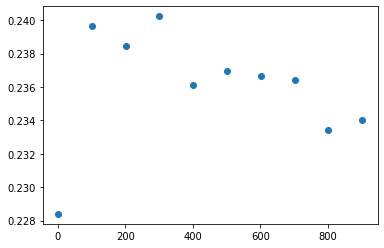

In [112]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
acc = []
for i in range(1,100,10):  
    classifier=MultinomialNB(alpha = i)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    score = accuracy_score(y_test, pred)
    acc.append(score)

plt.plot(range(1,1000,100),acc,'o')
plt.show()

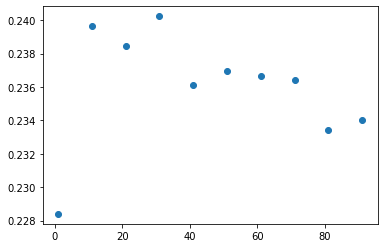

In [113]:
plt.plot(range(1,100,10),acc,'o')
plt.show()

In [63]:
##Finiding the error for the trained model on test data
mean_absolute_error(y_test,pred)

1.3677514792899408

In [108]:
acc[-1]

0.21627218934911244

Multinomial Naive Bayes Model

In [114]:

clf = MultinomialNB(alpha = 30)
clf.fit(X_train,y_train)

mean_absolute_error(y_test,clf.predict(X_test))


1.399112426035503

In [115]:
pred1 = clf.predict(X_test)

In [116]:
score = accuracy_score(y_test, pred1)

score

0.24053254437869823

In [ ]:
from sklearn.svm import SVC
clf_s = SVC(C=5,gamma = 0.1).fit(X_train[:,:3000],y_train)
clf_s.score(X_test,y_test)

In [124]:
x = clf.predict_proba(X1)

In [125]:
x = pd.DataFrame(x,columns= [0,1,2,3,4,5])

Generating the result file for the test data

In [126]:
x.to_csv('res_27.csv',index = False)

In [127]:
x.head()

,0,1,2,3,4,5
0,0.137000,0.229655,0.259726,0.184150,0.056973,0.132496
1,0.135306,0.300921,0.166537,0.166211,0.069986,0.161039
2,0.236144,0.191809,0.183319,0.137819,0.088658,0.162251
3,0.167032,0.239168,0.243418,0.170161,0.032779,0.147442
4,0.060187,0.703913,0.099731,0.081977,0.036450,0.017744


XG Boost Classifier

In [130]:
#8:54
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth = 8)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.23994082840236686

Passive Aggressive Classifier training and error checking

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=100)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score1 = accuracy_score(y_test, pred)
print(score1)


C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.20828402366863905


In [75]:
mean_absolute_error(y_test,pred)

1.7591715976331361